In [28]:
import numpy as np
import pandas as pd
from PIL import Image
np.random.seed(123)
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import random

import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization,Input
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Activation
from tensorflow.keras import backend as K
from model_utils import read_data
from preprogressor import prepare_client_data, prepare_server_data
from sklearn.metrics import classification_report, confusion_matrix
import math



from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

In [29]:
dataset = pd.read_csv('C:\\Users\\giorg\\Downloads\\fl\\heart.csv')

In [30]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [31]:
df= dataset.sample(frac=1)

In [32]:
df = df.rename(columns={'age': '0', 
                        'sex': '1',
                        'cp': '2',
                        'trestbps': '3',
                        'chol': '4',
                        'fbs': '5',
                        'restecg': '6',
                        'thalach': '7',
                        'exang': '8',
                        'oldpeak': '9',
                        'slope': '10',
                        'ca': '11',
                        'thal': '13',
                        
                       })

In [33]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,13,target
11,48,0,2,130,275,0,1,139,0,0.2,2,0,2,1
292,58,0,0,170,225,1,0,146,1,2.8,1,2,1,0
269,56,1,0,130,283,1,0,103,1,1.6,0,0,3,0
268,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0
94,45,0,1,112,160,0,1,138,0,0.0,1,0,2,1


In [34]:
train, test = train_test_split(df, test_size=0.2)

In [35]:
a, b, c, d, e = np.array_split(train, 5)

In [36]:
DFtrain = pd.DataFrame(train)
DFtrain.head()

,0,1,2,3,4,5,6,7,8,9,10,11,13,target
184,50,1,0,150,243,0,0,128,0,2.6,1,0,3,0
252,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
59,57,0,0,128,303,0,0,159,0,0.0,2,1,2,1
277,57,1,1,124,261,0,1,141,0,0.3,2,0,3,0
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1


In [37]:
a1 = pd.DataFrame(a)
b1 = pd.DataFrame(b)
c1 = pd.DataFrame(c)
d1 = pd.DataFrame(d)
e1 = pd.DataFrame(e)

In [38]:
np.save("C:\\Users\\giorg\\Downloads\\fl\\raw\\a", a)
np.save("C:\\Users\\giorg\\Downloads\\fl\\raw\\b", b)
np.save("C:\\Users\\giorg\\Downloads\\fl\\raw\\c", c)
np.save("C:\\Users\\giorg\\Downloads\\fl\\raw\\d", d)
np.save("C:\\Users\\giorg\\Downloads\\fl\\raw\\e", e)

In [39]:
test = pd.DataFrame(test)

In [40]:
train.shape

(242, 14)

In [41]:
train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,13,target
184,50,1,0,150,243,0,0,128,0,2.6,1,0,3,0
252,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
59,57,0,0,128,303,0,0,159,0,0.0,2,1,2,1
277,57,1,1,124,261,0,1,141,0,0.3,2,0,3,0
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1


In [42]:
Xtr=train.drop(columns=['target'],axis=1)
Ytr=DFtrain['target']

In [43]:
a.shape

(49, 14)

In [44]:
clients_data_file_name = ['a.npy', 'b.npy', 'c.npy', 'd.npy', 'e.npy']
# prepare train data and test data of each client
clients = {}
client_data_test = []
client_names = ['{}_{}'.format('client', i+1) for i in range(5)]
i = 0
for client_data_file_name in clients_data_file_name:
    x_train,x_test = prepare_client_data(client_data_file_name)
    Y = []
    X = []       
    for e in x_train: (Y.append(0) if e[13] == 0 else Y.append(1))
    Y = np.array(Y)
    X = x_train[:, :-1]
    data = list(zip(X, Y))
    clients.update({client_names[i] :data})
    client_data_test.append(x_test)
    i+=1

In [45]:
def batch_data(data_shard, bs=4):
    '''Takes in a clients data shard and create a tfds object off it
    args:
        shard: a data, label constituting a client's data shard
        bs:batch size
    return:
        tfds object'''
    #seperate shard into data and labels lists
    data, label = zip(*data_shard)
    dataset = tf.data.Dataset.from_tensor_slices((list(data), list(label)))
    return dataset.shuffle(len(label)).batch(bs)

In [46]:
#process and batch the training data for each client
clients_batched = dict()
for (client_name, data) in clients.items():
    clients_batched[client_name] = batch_data(data)

In [53]:
class SimpleMLP:
    @staticmethod
    def build(x_train,n=1):
        
        model = Sequential()
        model.add(Input(shape=(x_train.shape[1],)))
        model.add(Dense(x_train.shape[1],activation='relu'))#,input_shape=(x_train.shape[1],)))
        model.add(Dropout(0.25))
        model.add(Dense(n*x_train.shape[1],activation='relu'))
        model.add(Dropout(0.5))
        model.add(Dense(n*x_train.shape[1],activation='relu'))

        model.add(Dense(1,activation='sigmoid'))
        return model

In [68]:
lr = 0.01 
comms_round = 10
loss='binary_crossentropy'
metrics = ['accuracy']
optimizer = SGD(lr=lr, decay=lr / comms_round, momentum=0.9)

In [77]:
def weight_scalling_factor(clients_trn_data, client_name):
    client_names = list(clients_trn_data.keys())
    #get the bs
    bs = list(clients_trn_data[client_name])[0][0].shape[0]
    #first calculate the total training data points across clinets
    global_count = sum([tf.data.experimental.cardinality(clients_trn_data[client_name]).numpy() for client_name in client_names])*bs
    # get the total number of data points held by a client
    local_count = tf.data.experimental.cardinality(clients_trn_data[client_name]).numpy()*bs
    return local_count/global_count


def scale_model_weights(weight, scalar):
    '''function for scaling a models weights'''
    weight_final = []
    steps = len(weight)
    for i in range(steps):
        weight_final.append(scalar * weight[i])
    return weight_final



def sum_scaled_weights(scaled_weight_list):
    '''Return the sum of the listed scaled weights. The is equivalent to scaled avg of the weights'''
    avg_grad = list()
    #get the average grad accross all client gradients
    for grad_list_tuple in zip(*scaled_weight_list):
        layer_mean = tf.math.reduce_sum(grad_list_tuple, axis=0)
        avg_grad.append(layer_mean)
        
    return avg_grad

In [78]:
def test_model(X_test, Y_test, global_model, comm_round):
    global_model.summary()
    cce = tf.keras.losses.BinaryCrossentropy()
    logits = global_model.predict(X_test)
    preidect = np.around(logits)
    conf = (confusion_matrix(Y_test,preidect))   
    loss = cce(Y_test, preidect)
    acc = accuracy_score(preidect,Y_test)
    print('comm_round: {} | global_acc: {} | global_loss: {}'.format(comm_round, acc, loss))
    return acc, loss,conf

In [79]:
def test_data_client(test_batched,global_model,comm_round):
    for(X_test, Y_test) in test_batched:
        global_acc1, global_loss1,conf = test_model(X_test, Y_test, global_model, comm_round)
        TN = conf[0][0]
        FP = conf[0][1]
        FN = conf[1][0]
        TP = conf[1][1]
        sensitivity1 = TP/(TP+FN) 
        specificity1 = TN/(FP+TN)
        BalanceACC1 = (sensitivity1+specificity1)/2
        G_mean1 = math.sqrt(sensitivity1*specificity1)
        FN_rate1= FN/(FN+TP) 
        FP_rate1 = FP/(FP+TN) 
        #add the data to arrays
        return BalanceACC1,G_mean1,global_acc1

In [84]:
smlp_global = SimpleMLP()
num_layers_mult=15
n=num_layers_mult
global_model = smlp_global.build(Xtr,n)
BalanceACC1,G_mean1,acc1, = [[],[],[],[]],[[],[],[],[]],[[],[],[],[]]
BalanceACC_= []
G_mean_= []
accuracy_= []

In [87]:
for comm_round in range(comms_round):
            
    # get the global model's weights - will serve as the initial weights for all local models
    global_weights = global_model.get_weights()
    
    #initial list to collect local model weights after scalling
    scaled_local_weight_list = list()

    #randomize client data - using keys
    client_names= list(clients_batched.keys())
    #random.shuffle(client_names)
    
    #loop through each client and create new local model
    for client in client_names:
        smlp_local = SimpleMLP()
        local_model = smlp_local.build(Xtr, n)
        local_model.compile(loss=loss, 
                      optimizer=optimizer, 
                      metrics=metrics,
                      experimental_run_tf_function=False)
        
        #set local model weight to the weight of the global model
        local_model.set_weights(global_weights)
        #fit local model with client's data
        local_model.fit(clients_batched[client],epochs=3, verbose=1)
        #scale the model weights and add to list       
        
        scaling_factor = weight_scalling_factor(clients_batched, client_name)
        scaled_weights = scale_model_weights(local_model.get_weights(), scaling_factor)
        scaled_local_weight_list.append(scaled_weights)
        
        #clear session to free memory after each communication round
        K.clear_session()
        
    #to get the average over all the local model, we simply take the sum of the scaled weights
    average_weights = sum_scaled_weights(scaled_local_weight_list)
    
    #update global model 
    global_model.set_weights(average_weights)
    #global_model.summary()
    
    
   #test global model and print out metrics after each communications round
    i = -1
    for test_data_ in client_data_test:
        yte = []
        xte = []
        for e in test_data_: yte.append(1) if (e[13] == 1) else yte.append(0)               
        yte = np.array(yte)
        xte = test_data_[:, :-1]
        test_batched = tf.data.Dataset.from_tensor_slices((xte, yte)).batch(len(yte))
        #global_model.compile(xte)
        balance, gmean, acc= test_data_client(test_batched,global_model,comm_round)
        BalanceACC1[i].append(balance)
        G_mean1[i].append(gmean)
        acc1[i].append(acc)
        i+=1

Epoch 1/3
9/9 [==============================] - 1s 91ms/step - loss: 0.6877 - accuracy: 0.5833
Epoch 2/3
9/9 [==============================] - 0s 4ms/step - loss: 0.6657 - accuracy: 0.6389
Epoch 3/3
9/9 [==============================] - 0s 4ms/step - loss: 0.6637 - accuracy: 0.6111
Epoch 1/3
9/9 [==============================] - 1s 76ms/step - loss: 0.5936 - accuracy: 0.7778
Epoch 2/3
9/9 [==============================] - 0s 4ms/step - loss: 0.5365 - accuracy: 0.7500
Epoch 3/3
9/9 [==============================] - 0s 4ms/step - loss: 0.6143 - accuracy: 0.7222
Epoch 1/3
9/9 [==============================] - 1s 93ms/step - loss: 0.6618 - accuracy: 0.6111
Epoch 2/3
9/9 [==============================] - 0s 4ms/step - loss: 0.6172 - accuracy: 0.6389
Epoch 3/3
9/9 [==============================] - 0s 4ms/step - loss: 0.6080 - accuracy: 0.6667
Epoch 1/3
9/9 [==============================] - 1s 76ms/step - loss: 0.6276 - accuracy: 0.7222
Epoch 2/3
9/9 [==============================]

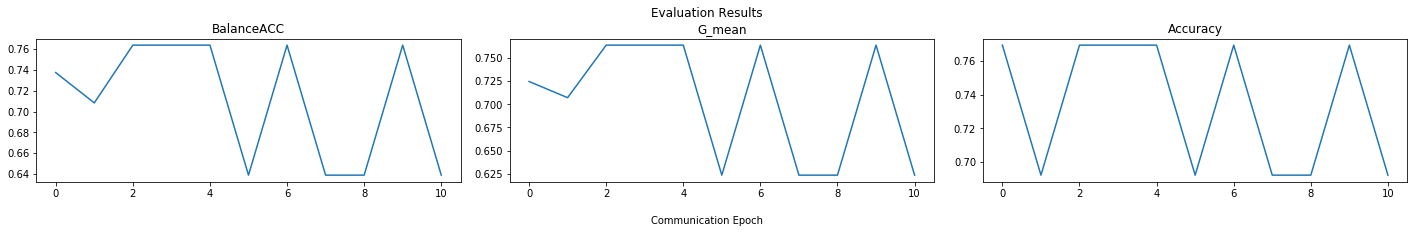

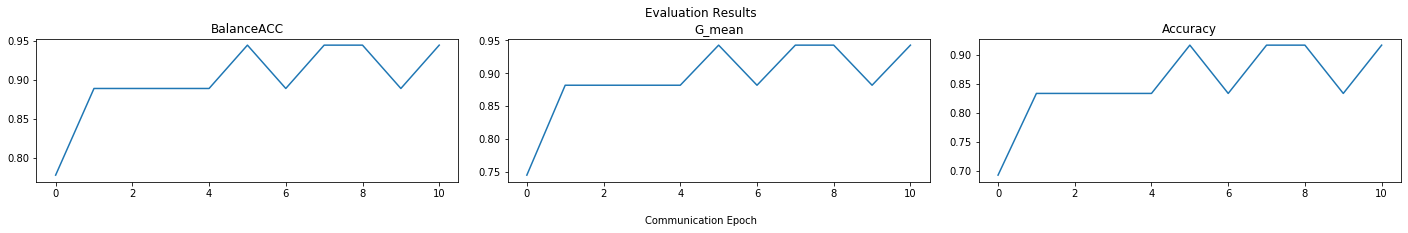

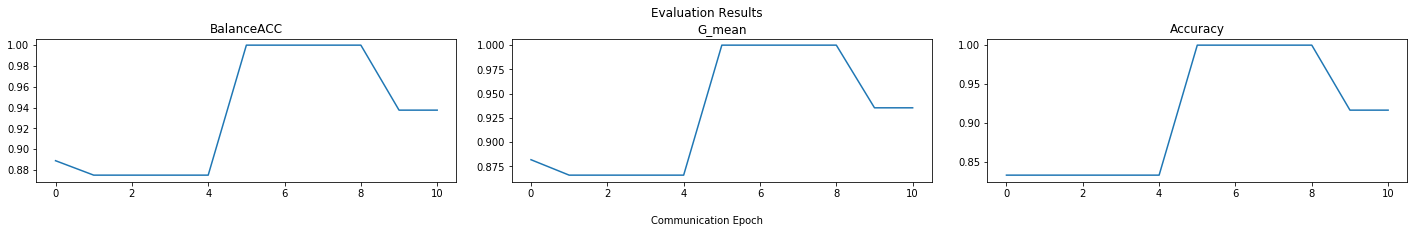

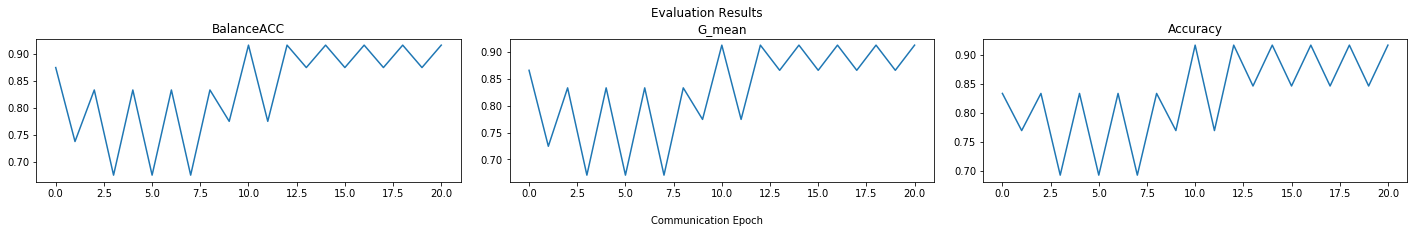

In [92]:
for i in range(4):
    fig, ax = plt.subplots(1,3,figsize=(20, 3))
    #fig.figure(figsize=(10, 3))
    fig.suptitle('Evaluation Results')

    ax[0].plot(BalanceACC1[i])
    ax[0].title.set_text('BalanceACC')
 
    ax[1].plot(G_mean1[i])
    ax[1].title.set_text('G_mean')


    ax[2].plot(acc1[i])
    ax[2].title.set_text('Accuracy')

    fig.tight_layout(pad=2.0)
    fig.text(0.5, -0.01, 'Communication Epoch', ha='center', va='center')